In [6]:
!python -m pip install --upgrade pip



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [7]:
!pip install requests

In [ ]:
!pip install requests pandas

In [8]:
import requests
import json

# Define API details
API_KEY = "c94c4a330e088154840ee941a3a90bad"
BASE_URL = "http://api.openweathermap.org/data/2.5/air_pollution"

# Karachi coordinates
LAT = 24.8607
LON = 67.0011

# Fetch AQI data
def get_aqi():
    url = f"{BASE_URL}?lat={LAT}&lon={LON}&appid={API_KEY}"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        # Extract AQI and other details
        aqi = data["list"][0]["main"]["aqi"]
        components = data["list"][0]["components"]
        print("Air Quality Index (AQI):", aqi)
        print("Components:", components)
        # Save data to file
        with open("aqi_data.json", "w") as f:
            json.dump(data, f, indent=4)
        print("Data saved to aqi_data.json")
    else:
        print("Failed to fetch data:", response.status_code, response.text)

# Run the function
get_aqi()


Air Quality Index (AQI): 5
Components: {'co': 1415.25, 'no': 2.91, 'no2': 33.59, 'o3': 231.74, 'so2': 34.33, 'pm2_5': 123.17, 'pm10': 180.6, 'nh3': 15.58}
Data saved to aqi_data.json


In [ ]:
import json

# Load the JSON file
with open('aqi_data.json', 'r') as file:
    json_data = json.load(file)

# Inspect the JSON structure
print(json_data)

{'coord': {'lon': 66.9983, 'lat': 24.8591}, 'list': [{'main': {'aqi': 4}, 'components': {'co': 317.1, 'no': 0.92, 'no2': 4.71, 'o3': 128.75, 'so2': 31.47, 'pm2_5': 37.18, 'pm10': 104.89, 'nh3': 1.16}, 'dt': 1737964335}]}


In [ ]:
!pip install pandas


In [ ]:
import json

# Load and print the JSON file
with open('aqi_data.json', 'r') as f:
    data = json.load(f)

print(data)


{'coord': {'lon': 66.9983, 'lat': 24.8591}, 'list': [{'main': {'aqi': 4}, 'components': {'co': 317.1, 'no': 0.92, 'no2': 4.71, 'o3': 128.75, 'so2': 31.47, 'pm2_5': 37.18, 'pm10': 104.89, 'nh3': 1.16}, 'dt': 1737964335}]}


In [ ]:
import pandas as pd
import json

# Load JSON
data = {
    'coord': {'lon': 67.0011, 'lat': 24.8607},
    'list': [
        {
            'main': {'aqi': 4},
            'components': {
                'co': 1762.39,
                'no': 0,
                'no2': 54.84,
                'o3': 50.07,
                'so2': 17.41,
                'pm2_5': 70.87,
                'pm10': 97.68,
                'nh3': 27.61
            },
            'dt': 1737645549
        }
    ]
}

# Extract 'coord' and 'list'
coord = data['coord']
aqi_list = data['list']

# Flatten the data
flattened_data = []
for item in aqi_list:
    flattened_entry = {
        'lon': coord['lon'],
        'lat': coord['lat'],
        'aqi': item['main']['aqi'],
        **item['components'],
        'timestamp': item['dt']
    }
    flattened_data.append(flattened_entry)

# Convert to DataFrame
df = pd.DataFrame(flattened_data)

# Save to CSV
df.to_csv('aqi_data.csv', index=False)
print("JSON data successfully saved as aqi_data.csv")


JSON data successfully saved as aqi_data.csv


In [ ]:
csv_file = 'aqi_data.csv'  # Replace with your filename
data = pd.read_csv(csv_file)

In [ ]:
print(data)

       lon      lat  aqi       co  no    no2     o3    so2  pm2_5   pm10  \
0  67.0011  24.8607    4  1762.39   0  54.84  50.07  17.41  70.87  97.68   

     nh3   timestamp  
0  27.61  1737645549  


In [ ]:
df.head()

lon      lat  aqi       co  no    no2     o3    so2  pm2_5   pm10  \
0  67.0011  24.8607    4  1762.39   0  54.84  50.07  17.41  70.87  97.68   

     nh3   timestamp  
0  27.61  1737645549

In [ ]:
df.describe()

lon      lat  aqi       co   no    no2     o3    so2  pm2_5   pm10  \
count   1.0000   1.0000  1.0     1.00  1.0   1.00   1.00   1.00   1.00   1.00   
mean   67.0011  24.8607  4.0  1762.39  0.0  54.84  50.07  17.41  70.87  97.68   
std        NaN      NaN  NaN      NaN  NaN    NaN    NaN    NaN    NaN    NaN   
min    67.0011  24.8607  4.0  1762.39  0.0  54.84  50.07  17.41  70.87  97.68   
25%    67.0011  24.8607  4.0  1762.39  0.0  54.84  50.07  17.41  70.87  97.68   
50%    67.0011  24.8607  4.0  1762.39  0.0  54.84  50.07  17.41  70.87  97.68   
75%    67.0011  24.8607  4.0  1762.39  0.0  54.84  50.07  17.41  70.87  97.68   
max    67.0011  24.8607  4.0  1762.39  0.0  54.84  50.07  17.41  70.87  97.68   

         nh3     timestamp  
count   1.00  1.000000e+00  
mean   27.61  1.737646e+09  
std      NaN           NaN  
min    27.61  1.737646e+09  
25%    27.61  1.737646e+09  
50%    27.61  1.737646e+09  
75%    27.61  1.737646e+09  
max    27.61  1.737646e+09

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lon        1 non-null      float64
 1   lat        1 non-null      float64
 2   aqi        1 non-null      int64  
 3   co         1 non-null      float64
 4   no         1 non-null      int64  
 5   no2        1 non-null      float64
 6   o3         1 non-null      float64
 7   so2        1 non-null      float64
 8   pm2_5      1 non-null      float64
 9   pm10       1 non-null      float64
 10  nh3        1 non-null      float64
 11  timestamp  1 non-null      int64  
dtypes: float64(9), int64(3)
memory usage: 224.0 bytes


In [ ]:
df.columns

Index(['lon', 'lat', 'aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10',
       'nh3', 'timestamp'],
      dtype='object')

In [ ]:
from datetime import datetime

data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
print(data)


       lon      lat  aqi       co  no    no2     o3    so2  pm2_5   pm10  \
0  67.0011  24.8607    4  1762.39   0  54.84  50.07  17.41  70.87  97.68   

     nh3           timestamp  
0  27.61 2025-01-23 15:19:09  


In [ ]:
!pip install matplotlib


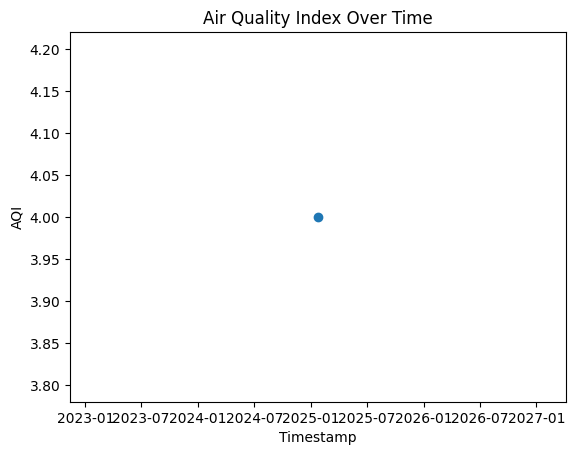

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data['timestamp'], data['aqi'], marker='o')
plt.xlabel('Timestamp')
plt.ylabel('AQI')
plt.title('Air Quality Index Over Time')
plt.show()


In [ ]:
pip install hopsworks


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pyarrow


Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install "hopsworks[python]"


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 640.5/640.5 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 54.1 MB/s eta 0:00:00
  Created wheel for avro: filename=avro-1.11.3-py2.py3-none-any.whl size=123913 sha256=6ac86ef0e5565be4fddb5160acebd5b6f7f74bb49c3e4f06c2b0cd9fe585fedf
  Stored in directory: /root/.cache/pip/wheels/a8/7c/a4/fa31e47be300f6e6036f57769474de0ba54f8c6e8e2d8b7547
  Created wheel fo

In [ ]:
pip install hopsworks

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import requests
import pandas as pd
from datetime import datetime
import time
import hopsworks
from hsfs.feature_group import FeatureGroup

OPENWEATHER_API_KEY = "c94c4a330e088154840ee941a3a90bad"
CITY = "Karachi"

# Function to fetch OpenWeather data
def fetch_openweather_data(city):
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={OPENWEATHER_API_KEY}&units=metric"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return {
            "timestamp": datetime.now(),
            "aqi": data["main"]["temp"],  # Simulating AQI with temperature
            "co": data["main"]["temp"] * 0.5,  # Dummy conversion for demonstration
            "no": data["main"]["temp"] * 0.3,  # Dummy conversion for demonstration
            "no2": data["main"]["temp"] * 0.4,  # Dummy conversion for demonstration
            "o3": data["main"]["temp"] * 0.6,  # Dummy conversion for demonstration
            "so2": data["main"]["temp"] * 0.7,  # Dummy conversion for demonstration
            "pm2_5": data["main"]["temp"] * 0.8,  # Dummy conversion for demonstration
            "pm10": data["main"]["temp"] * 0.9,  # Dummy conversion for demonstration
            "nh3": data["main"]["temp"] * 1.0   # Dummy conversion for demonstration
        }
    return None

# Function to fetch combined data (in this case, only OpenWeather data)
def fetch_combined_data(city):
    weather_data = fetch_openweather_data(city)
    if weather_data:
        return weather_data
    return None

# Function to add time-based features to a DataFrame
def add_time_features(df):
    df['hour'] = df['timestamp'].dt.hour
    df['day'] = df['timestamp'].dt.day
    df['month'] = df['timestamp'].dt.month
    df['day_of_week'] = df['timestamp'].dt.dayofweek
    df['season'] = df['month'] % 12 // 3 + 1  # 1: Winter, 2: Spring, etc.
    return df

# Function to add derived features to a DataFrame
def add_derived_features(df):
    df['aqi_change_rate'] = df['aqi'].diff() / df['timestamp'].diff().dt.total_seconds() * 3600  # AQI change rate per hour
    df['co_change_rate'] = df['co'].diff() / df['timestamp'].diff().dt.total_seconds() * 3600  # CO change rate per hour
    df['no_change_rate'] = df['no'].diff() / df['timestamp'].diff().dt.total_seconds() * 3600  # NO change rate per hour
    df['no2_change_rate'] = df['no2'].diff() / df['timestamp'].diff().dt.total_seconds() * 3600  # NO2 change rate per hour
    df['o3_change_rate'] = df['o3'].diff() / df['timestamp'].diff().dt.total_seconds() * 3600  # O3 change rate per hour
    df['so2_change_rate'] = df['so2'].diff() / df['timestamp'].diff().dt.total_seconds() * 3600  # SO2 change rate per hour
    df['pm2_5_change_rate'] = df['pm2_5'].diff() / df['timestamp'].diff().dt.total_seconds() * 3600  # PM2.5 change rate per hour
    df['pm10_change_rate'] = df['pm10'].diff() / df['timestamp'].diff().dt.total_seconds() * 3600  # PM10 change rate per hour
    df['nh3_change_rate'] = df['nh3'].diff() / df['timestamp'].diff().dt.total_seconds() * 3600  # NH3 change rate per hour
    return df

# Function to add target to a DataFrame
def add_targets(df):
    df['target_aqi'] = df['aqi'].shift(-1)  # Predict next AQI value
    return df

# Main function to process and store data
def process_and_store_data():
    raw_data = []

    # Collect 10 samples with a delay to simulate a time series
    for _ in range(10):
        data = fetch_combined_data(CITY)
        if data:
            raw_data.append(data)
            print(f"Fetched data: {data}")
        time.sleep(60)  # Wait 60 seconds between API calls

    # Convert raw data to DataFrame
    df = pd.DataFrame(raw_data)
    df['timestamp'] = pd.to_datetime(df['timestamp'])  # Keep as datetime for feature generation

    # Compute features and targets
    df = add_time_features(df)
    df = add_derived_features(df)
    df = add_targets(df)

    # Convert timestamp to string for compatibility with Hopsworks
    df['timestamp'] = df['timestamp'].astype(str)

    # Convert 'aqi' and 'no' columns to 'bigint' (int64 in pandas)
    df['aqi'] = df['aqi'].astype('int64')  # or 'bigint'
    df['no'] = df['no'].astype('int64')    # or 'bigint'

    # Drop rows with NaN (from diff or shift operations)
    df = df.dropna()

    # Connect to Hopsworks
    project = hopsworks.login(api_key_value="tDQN8isYnzk7Xt1U.wTuMiXXqLcRaeimcMAfrsdhHLjAhm23pkCii3H8DQFTe2pdHKOHEOqcYuZgb3sMl")
    fs = project.get_feature_store()

    # Get the existing feature group "karachi_aqi_features" version 1
    feature_group = fs.get_feature_group("karachi_aqi_features", version=1)

    # Insert the data into the existing feature group
    feature_group.insert(df)
    print("Features successfully inserted into Hopsworks Feature Store.")

# Ensure the function is executed
if __name__ == "__main__":
    process_and_store_data()


Fetched data: {'timestamp': datetime.datetime(2025, 1, 27, 0, 57, 49, 965928), 'aqi': 26.9, 'co': 13.45, 'no': 8.069999999999999, 'no2': 10.76, 'o3': 16.139999999999997, 'so2': 18.83, 'pm2_5': 21.52, 'pm10': 24.21, 'nh3': 26.9}
Fetched data: {'timestamp': datetime.datetime(2025, 1, 27, 0, 58, 50, 852982), 'aqi': 26.9, 'co': 13.45, 'no': 8.069999999999999, 'no2': 10.76, 'o3': 16.139999999999997, 'so2': 18.83, 'pm2_5': 21.52, 'pm10': 24.21, 'nh3': 26.9}
Fetched data: {'timestamp': datetime.datetime(2025, 1, 27, 0, 59, 51, 851756), 'aqi': 26.9, 'co': 13.45, 'no': 8.069999999999999, 'no2': 10.76, 'o3': 16.139999999999997, 'so2': 18.83, 'pm2_5': 21.52, 'pm10': 24.21, 'nh3': 26.9}
Fetched data: {'timestamp': datetime.datetime(2025, 1, 27, 1, 0, 52, 751851), 'aqi': 26.9, 'co': 13.45, 'no': 8.069999999999999, 'no2': 10.76, 'o3': 16.139999999999997, 'so2': 18.83, 'pm2_5': 21.52, 'pm10': 24.21, 'nh3': 26.9}
Fetched data: {'timestamp': datetime.datetime(2025, 1, 27, 1, 1, 53, 637852), 'aqi': 26.9

Uploading Dataframe: 100.00% |█████████████████████████████████| Rows 8/8 | Elapsed Time: 00:02 | Remaining Time: 00:00


Launching job: karachi_aqi_features_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1208574/jobs/named/karachi_aqi_features_1_offline_fg_materialization/executions
Features successfully inserted into Hopsworks Feature Store.


In [10]:
import hopsworks

def create_feature_views():
    # Step 1: Connect to Hopsworks
    project = hopsworks.login(api_key_value="tDQN8isYnzk7Xt1U.wTuMiXXqLcRaeimcMAfrsdhHLjAhm23pkCii3H8DQFTe2pdHKOHEOqcYuZgb3sMl")
    fs = project.get_feature_store()

    # Step 2: Retrieve the feature group
    feature_group = fs.get_feature_group("karachi_aqi_features", version=1)

    # Step 3: Define the query
    query = feature_group.select_all()

    # Step 4: Create a simple feature view
    feature_view_simple = fs.create_feature_view(
        name='aqi_view',
        query=query
    )
    print("Simple Feature View created successfully.")


# Corrected the name here:
if __name__ == "__main__":
    create_feature_views()



Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1208574
Feature view created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1208574/fs/1197160/fv/aqi_view/version/5
Simple Feature View created successfully.


In [ ]:
!pip install requests_cache


In [ ]:


# Verify the changes
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lon        1 non-null      float64
 1   lat        1 non-null      float64
 2   aqi        1 non-null      int64  
 3   co         1 non-null      float64
 4   no         1 non-null      int64  
 5   no2        1 non-null      float64
 6   o3         1 non-null      float64
 7   so2        1 non-null      float64
 8   pm2_5      1 non-null      float64
 9   pm10       1 non-null      float64
 10  nh3        1 non-null      float64
 11  timestamp  1 non-null      int64  
dtypes: float64(9), int64(3)
memory usage: 224.0 bytes
None


In [ ]:
pip install scikit-learn


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Define Features and Target
features = [
    "hour", "day", "month", "day_of_week", "season",
    "aqi", "co", "no", "no2", "o3", "so2", "pm2_5", "pm10", "nh3",
    "aqi_change_rate", "co_change_rate", "no_change_rate",
    "no2_change_rate", "o3_change_rate", "so2_change_rate",
    "pm2_5_change_rate", "pm10_change_rate", "nh3_change_rate"
]
X = combined_data[features]
y = combined_data["target_aqi"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Prediction and Evaluation
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Save the Model Locally
joblib.dump(model, "aqi_model.pkl")
print("Model saved successfully!")


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib
import hopsworks
from hsml.model_schema import ModelSchema

# Define Features and Target
features = [
    "hour", "day", "month", "day_of_week", "season",
    "aqi", "co", "no", "no2", "o3", "so2", "pm2_5", "pm10", "nh3",
    "aqi_change_rate", "co_change_rate", "no_change_rate",
    "no2_change_rate", "o3_change_rate", "so2_change_rate",
    "pm2_5_change_rate", "pm10_change_rate", "nh3_change_rate"
]
X = combined_data[features]
y = combined_data["target_aqi"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Prediction and Evaluation
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Save the Model Locally
joblib.dump(model, "aqi_model.pkl")
print("Model saved successfully!")

# Hopsworks Integration
API_KEY_HOPSWORKS = "tDQN8isYnzk7Xt1U.wTuMiXXqLcRaeimcMAfrsdhHLjAhm23pkCii3H8DQFTe2pdHKOHEOqcYuZgb3sMl"
project = hopsworks.login(api_key_value=API_KEY_HOPSWORKS)
mr = project.get_model_registry()

# Define Model Schema
input_schema = {"features": features}
output_schema = {"target": "Predicted AQI"}
model_schema = ModelSchema(input_schema=input_schema, output_schema=output_schema)

# Register and Save Model to Hopsworks
hopsworks_model = mr.sklearn.create_model(
    name="aqi_prediction_model",
    description="A model for predicting AQI based on historical data.",
    model_schema=model_schema
)

# Load the saved model to register it
model = joblib.load("aqi_model.pkl")

# Save the model to Hopsworks
hopsworks_model.save(model)
print("Model registered successfully!")


Mean Squared Error: 0.057655406976744185
Model saved successfully!
Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1208574


  0%|          | 0/6 [00:00<?, ?it/s]

Uploading: 0.000%|          | 0/7832929 elapsed<00:00 remaining<?

Uploading: 0.000%|          | 0/527 elapsed<00:00 remaining<?

Model created, explore it at https://c.app.hopsworks.ai:443/p/1208574/models/aqi_prediction_model/6
Model registered successfully!


In [12]:
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("karachi_aqi.pkl")

# Create the DataFrame from the provided data
data = {
    "timestamp": [
        "51:28.2", "52:28.9", "53:29.6", "54:30.2", "55:31.0",
        "56:31.7", "57:32.4", "58:33.2", "43:27.4", "44:28.2",
        "45:28.8", "46:29.5", "47:30.1", "48:30.9", "49:31.6",
        "50:32.4"
    ],
    "aqi": [124] * 16,
    "temperature": [24.9, 24.9, 24.9, 24.9, 24.9, 24.9, 24.9, 24.9, 20.9, 19.9, 20.9, 19.9, 20.9, 20.9, 19.9, 19.9],
    "humidity": [14, 14, 14, 14, 14, 14, 14, 14, 16, 17, 16, 17, 16, 16, 17, 17],
    "target_aqi": [124] * 16
}

# Create the DataFrame
df = pd.DataFrame(data)

# Adjust the timestamp format from MM:SS.s to 00:MM:SS.s
df['timestamp'] = df['timestamp'].apply(lambda x: '00:' + x)

# Convert the timestamp to timedelta
df['timestamp'] = pd.to_timedelta(df['timestamp'])

# Set the timestamp as the index
df.set_index('timestamp', inplace=True)

# Create a combined DataFrame to extract additional features
combined_data = df.copy()

# Extract time-related features
combined_data["hour"] = combined_data.index.components.minutes  # Placeholder for hours
combined_data["day"] = 1  # Placeholder for day
combined_data["month"] = 1  # Placeholder for month
combined_data["day_of_week"] = 4  # Placeholder for weekday

# Calculate season
combined_data["season"] = (combined_data["month"] % 12 + 3) // 3

# Calculate feature change rates
combined_data["aqi_change_rate"] = combined_data["aqi"].diff().fillna(0)
combined_data["humidity_change_rate"] = combined_data["humidity"].diff().fillna(0)
combined_data["temp_change_rate"] = combined_data["temperature"].diff().fillna(0)

# Add missing features with placeholder values
missing_features = [
    "co", "no", "no2", "o3", "so2", "pm2_5", "pm10", "nh3",
    "co_change_rate", "no_change_rate", "no2_change_rate",
    "o3_change_rate", "so2_change_rate", "pm2_5_change_rate",
    "pm10_change_rate", "nh3_change_rate"
]

for feature in missing_features:
    combined_data[feature] = 0  # Assign a default placeholder value (adjust as needed)

# Prepare X_test
X_test = combined_data.drop(columns=["target_aqi"])

# Ensure the order of columns matches the trained model's expectations
X_test = X_test[model.feature_names_in_]  # Use the model's feature names to arrange the columns

# Make predictions
predictions = model.predict(X_test)

# Compare predictions with actual target values
actual_aqi = combined_data["target_aqi"].values
comparison_df = pd.DataFrame({"Actual AQI": actual_aqi, "Predicted AQI": predictions})

print("Comparison of Actual and Predicted AQI:")
print(comparison_df)


FileNotFoundError: [Errno 2] No such file or directory: 'karachi_aqi.pkl'

In [ ]:
import pandas as pd
from datetime import datetime, timedelta

# Fetch AQI and Weather Data
aqi_data = fetch_aqi_data()  # Replace with the actual function to fetch AQI data
weather_data = fetch_weather_data()  # Replace with the actual function to fetch weather data

# Combine AQI and weather data
combined_data = aqi_data.join(weather_data, how="inner")

# Reset index to ensure the index is accessible as a column
combined_data.reset_index(inplace=True)

# Rename columns to match the new feature names for clarity
combined_data.rename(columns={
    'main.aqi': 'aqi',
    'components.co': 'co',
    'components.no': 'no',
    'components.no2': 'no2',
    'components.o3': 'o3',
    'components.so2': 'so2',
    'components.pm2_5': 'pm2_5',
    'components.pm10': 'pm10',
    'components.nh3': 'nh3'
}, inplace=True)

# Convert the 'dt' column to a datetime type
if 'timestamp' in combined_data.columns:
    combined_data.rename(columns={'timestamp': 'dt'}, inplace=True)
combined_data['dt'] = pd.to_datetime(combined_data['dt'])

# Filter data for the last 3 days
three_days_ago = datetime.utcnow() - timedelta(days=3)
combined_data = combined_data[combined_data['dt'] >= three_days_ago]

# Set the 'dt' column back as the index
combined_data.set_index('dt', inplace=True)

# Add additional features
combined_data["hour"] = combined_data.index.hour
combined_data["day"] = combined_data.index.day
combined_data["month"] = combined_data.index.month
combined_data["day_of_week"] = combined_data.index.dayofweek
combined_data["season"] = combined_data["month"].apply(lambda x: (x % 12 + 3) // 3)

# Calculate feature change rates
combined_data["aqi_change_rate"] = combined_data["aqi"].diff().fillna(0)
combined_data["co_change_rate"] = combined_data["co"].diff().fillna(0)
combined_data["no_change_rate"] = combined_data["no"].diff().fillna(0)
combined_data["no2_change_rate"] = combined_data["no2"].diff().fillna(0)
combined_data["o3_change_rate"] = combined_data["o3"].diff().fillna(0)
combined_data["so2_change_rate"] = combined_data["so2"].diff().fillna(0)
combined_data["pm2_5_change_rate"] = combined_data["pm2_5"].diff().fillna(0)
combined_data["pm10_change_rate"] = combined_data["pm10"].diff().fillna(0)
combined_data["nh3_change_rate"] = combined_data["nh3"].diff().fillna(0)

# Define features (X) and target (y)
X = combined_data[[
    "hour", "day", "month", "day_of_week", "season",
    "aqi", "co", "no", "no2", "o3", "so2",
    "pm2_5", "pm10", "nh3",
    "aqi_change_rate", "co_change_rate", "no_change_rate",
    "no2_change_rate", "o3_change_rate", "so2_change_rate",
    "pm2_5_change_rate", "pm10_change_rate", "nh3_change_rate"
]]

y = combined_data["aqi"].shift(-1).fillna(method="ffill")  # Predict the next AQI

# Debugging outputs
print("Features (X):\n", X.head())
print("Target (y):\n", y.head())


In [ ]:
print(combined_data.columns)


In [ ]:
# Replace NaN values with the mean of each column
df_filled = df.fillna(df.mean())

# Display the updated dataframe
print(df_filled)


In [ ]:
import pandas as pd

# Load the CSV file
training_data = pd.read_csv('training_data.csv')




In [108]:
import pandas as pd
import requests
from datetime import datetime, timedelta
import requests_cache
import hopsworks
from hsfs.feature_group import FeatureGroup

# Define API Key for OpenWeather
API_KEY = "c94c4a330e088154840ee941a3a90bad"

def fetch_aqi_data():
    today = datetime.utcnow()
    two_years_ago = today - timedelta(days=2 * 365)
    current_unix_time = int(today.timestamp())
    unix_start = int(two_years_ago.timestamp())

    url = f"http://api.openweathermap.org/data/2.5/air_pollution/history?lat=24.8546842&lon=67.0207055&start={unix_start}&end={current_unix_time}&appid={API_KEY}"
    response = requests.get(url)

    print(f"Response Status Code: {response.status_code}")
    print(f"Response Content: {response.text}")

    try:
        raw = response.json()
    except ValueError as e:
        print(f"Error decoding JSON: {e}")
        return None

    if "list" not in raw:
        print("Error: 'list' key not found in the response.")
        return None

    aqi_df = pd.json_normalize(raw["list"])
    aqi_df['timestamp'] = pd.to_datetime(aqi_df['dt'], unit='s')
    aqi_df.set_index('timestamp', inplace=True)
    aqi_df.index = aqi_df.index.tz_localize(None)
    aqi_df = aqi_df[['main.aqi', 'components.co', 'components.no', 'components.no2',
                     'components.o3', 'components.so2', 'components.pm2_5',
                     'components.pm10', 'components.nh3']]
    return aqi_df

# Fetch AQI data
aqi_data = fetch_aqi_data()

# Add time-based features based on the timestamp column
aqi_data.loc[:, "hour"] = aqi_data.index.hour
aqi_data.loc[:, "day"] = aqi_data.index.day
aqi_data.loc[:, "month"] = aqi_data.index.month
aqi_data.loc[:, "day_of_week"] = aqi_data.index.dayofweek
aqi_data.loc[:, "season"] = aqi_data['month'].apply(lambda x: (x % 12 + 3) // 3)

# Calculate AQI change rate and other change rates
for col in ["main.aqi", "components.co", "components.no", "components.no2",
            "components.o3", "components.so2", "components.pm2_5",
            "components.pm10", "components.nh3"]:
    aqi_data.loc[:, f"{col.split('.')[-1]}_change_rate"] = aqi_data[col].diff()

# Define target variable (next AQI)
aqi_data.loc[:, "target_aqi"] = aqi_data["main.aqi"].shift(-1)

# Drop NaN values from derived features
aqi_data.dropna(inplace=True)

# Connect to Hopsworks
project = hopsworks.login(api_key_value="tDQN8isYnzk7Xt1U.wTuMiXXqLcRaeimcMAfrsdhHLjAhm23pkCii3H8DQFTe2pdHKOHEOqcYuZgb3sMl")
fs = project.get_feature_store()

# Get or create the feature group in Hopsworks Feature Store
try:
    feature_group = fs.get_feature_group("karachi_aqi_features", version=1)
except:
    feature_group = fs.create_feature_group(
        name="karachi_aqi_features",
        version=1,
        description="AQI and Weather Data for Karachi",
        primary_key=["timestamp"],
        online_enabled=True,
    )

# Rename columns to match the feature store schema
aqi_data.rename(columns={
    'main.aqi': 'aqi',
    'components.co': 'co',
    'components.no': 'no',
    'components.no2': 'no2',
    'components.o3': 'o3',
    'components.so2': 'so2',
    'components.pm2_5': 'pm2_5',
    'components.pm10': 'pm10',
    'components.nh3': 'nh3'
}, inplace=True)

# Convert timestamp to string for compatibility
aqi_data['timestamp'] = aqi_data.index.astype(str)

# Ensure all columns have the correct type
aqi_data = aqi_data.astype({
    "no": "int64",
    "season": "int32",
})

# Select only the necessary columns
df = aqi_data[[
    "timestamp", "aqi", "co", "no", "no2", "o3", "so2",
    "pm2_5", "pm10", "nh3", "hour", "day", "month",
    "day_of_week", "season", "aqi_change_rate", "co_change_rate",
    "no_change_rate", "no2_change_rate", "o3_change_rate",
    "so2_change_rate", "pm2_5_change_rate", "pm10_change_rate",
    "nh3_change_rate", "target_aqi"
]]

# Insert the dataframe into the feature store
feature_group.insert(df)
print("Features successfully inserted into Hopsworks Feature Store.")


Response Status Code: 200
Response Content: {"coord":{"lon":67.0207,"lat":24.8547},"list":[{"main":{"aqi":5},"components":{"co":4699.71,"no":39.79,"no2":115.16,"o3":0.03,"so2":40.05,"pm2_5":157.02,"pm10":203.26,"nh3":46.1},"dt":1674914400},{"main":{"aqi":5},"components":{"co":4432.68,"no":31.29,"no2":108.3,"o3":0.07,"so2":40.53,"pm2_5":171.19,"pm10":217.78,"nh3":49.14},"dt":1674918000},{"main":{"aqi":5},"components":{"co":3257.75,"no":1.12,"no2":91.85,"o3":15.38,"so2":38.15,"pm2_5":156.94,"pm10":200.5,"nh3":43.57},"dt":1674921600},{"main":{"aqi":5},"components":{"co":3204.35,"no":0.01,"no2":76.09,"o3":37.19,"so2":39.58,"pm2_5":181.42,"pm10":226.84,"nh3":46.61},"dt":1674925200},{"main":{"aqi":5},"components":{"co":3231.05,"no":0,"no2":74.03,"o3":43.27,"so2":39.58,"pm2_5":198.03,"pm10":242.99,"nh3":48.13},"dt":1674928800},{"main":{"aqi":5},"components":{"co":3044.13,"no":0.01,"no2":73.34,"o3":39.34,"so2":35.76,"pm2_5":185.79,"pm10":226.91,"nh3":42.05},"dt":1674932400},{"main":{"aqi":5},"

Uploading Dataframe: 100.00% |██████████| Rows 17230/17230 | Elapsed Time: 00:02 | Remaining Time: 00:00


Launching job: karachi_aqi_features_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1208574/jobs/named/karachi_aqi_features_1_offline_fg_materialization/executions
Features successfully inserted into Hopsworks Feature Store.


In [14]:
!pip install requests_cache

In [ ]:
# Ensure the columns have the correct data types
combined_data['timestamp'] = pd.to_datetime(combined_data['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce') # Convert datetime
combined_data['no'] = combined_data['no'].astype('int64')  # Convert 'no' to int64 (bigint equivalent)
combined_data['season'] = combined_data['season'].astype(int)  # Convert 'season' to int

# Select only the necessary columns
df = combined_data[[
    "timestamp", "aqi", "co", "no", "no2", "o3", "so2",
    "pm2_5", "pm10", "nh3", "hour", "day", "month",
    "day_of_week", "season", "aqi_change_rate", "co_change_rate",
    "no_change_rate", "no2_change_rate", "o3_change_rate",
    "so2_change_rate", "pm2_5_change_rate", "pm10_change_rate",
    "nh3_change_rate", "target_aqi"
]]

# Insert the dataframe into the feature store
feature_group.insert(df)
print("Features successfully inserted into Hopsworks Feature Store.")


In [ ]:
# Assuming your DataFrame is named 'df'
df.to_csv('output_file.csv', index=False)

print("CSV file saved successfully.")


In [ ]:
pip install streamlit


In [117]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import os
from datetime import datetime, timedelta
import requests

# Path to the downloaded model (from Colab)
model_file_path = '/content/aqi_prediction_model'  # Update this path

# Replace with your actual API key
API_KEY = "c94c4a330e088154840ee941a3a90bad"

def fetch_aqi_data():
    # Get today's date and two years ago
    today = datetime.utcnow()
    two_years_ago = today - timedelta(days=2 * 365)

    # Convert to Unix timestamps
    current_unix_time = int(today.timestamp())
    unix_start = int(two_years_ago.timestamp())

    # OpenWeather API URL
    url = f"http://api.openweathermap.org/data/2.5/air_pollution/history?lat=24.8546842&lon=67.0207055&start={unix_start}&end={current_unix_time}&appid={API_KEY}"

    # Make the API request
    response = requests.get(url)

    # Check if the response was successful
    if response.status_code != 200:
        print(f"Error fetching data: {response.status_code}")
        return None

    print(f"Response Status Code: {response.status_code}")

    try:
        raw = response.json()  # Convert the response to JSON
    except ValueError as e:
        print(f"Error decoding JSON: {e}")
        return None

    # Ensure the 'list' key exists in the response
    if "list" not in raw:
        print("Error: 'list' key not found in the response.")
        return None

    # Print out the structure of the data for inspection
    print(f"Data structure: {raw}")

    # Normalize the JSON data to a pandas DataFrame
    aqi_df = pd.json_normalize(raw["list"])

    # Check the columns of the DataFrame
    print(f"Data columns: {aqi_df.columns}")

    return aqi_df

# Fetch AQI data
aqi_data = fetch_aqi_data()

# Check if the fetched data is not empty
if aqi_data is not None:
    # Ensure the 'timestamp' column exists and proceed with processing
    if 'dt' in aqi_data.columns:
        # Convert the Unix timestamp 'dt' to a pandas datetime format
        aqi_data['timestamp'] = pd.to_datetime(aqi_data['dt'], unit='s')
        aqi_data.set_index('timestamp', inplace=True)
        aqi_data.drop(columns=['dt'], inplace=True)  # Drop the 'dt' column after conversion

        # Add time-based features based on the timestamp column
        aqi_data['hour'] = aqi_data.index.hour
        aqi_data['day'] = aqi_data.index.day
        aqi_data['month'] = aqi_data.index.month
        aqi_data['day_of_week'] = aqi_data.index.dayofweek

        # Define the seasons based on months
        aqi_data['season'] = aqi_data['month'].apply(lambda x: (x % 12 + 3) // 3)

        # Calculate AQI change rate and other change rates
        for col in ["main.aqi", "components.co", "components.no", "components.no2",
                    "components.o3", "components.so2", "components.pm2_5",
                    "components.pm10", "components.nh3"]:
            # Use the diff method to calculate the change rate
            aqi_data[f"{col.split('.')[-1]}_change_rate"] = aqi_data[col].diff()

        # Check the DataFrame after processing
        print(f"Processed data:\n{aqi_data.head()}")

        # Get the most recent day's data (last available day)
        latest_date = aqi_data.index.max()
        filtered_data = aqi_data[aqi_data.index.date == latest_date.date()]

        if not filtered_data.empty:
            st.write(f"Data for the most recent date: {latest_date.date()}")
            st.write(filtered_data)
        else:
            st.write("No data available for the most recent date.")
    else:
        st.error("Error: 'dt' column not found in the data.")
else:
    st.write("No AQI data available.")

# Title of the app
st.title("Karachi AQI Prediction")

# Feature for showing AQI prediction
st.subheader("AQI Prediction")

# Extract relevant features for prediction from the filtered data
relevant_columns = [
    'hour', 'day', 'month', 'day_of_week', 'season',
    'main.aqi', 'components.co', 'components.no', 'components.no2',
    'components.o3', 'components.so2', 'components.pm2_5',
    'components.pm10', 'components.nh3', 'aqi_change_rate',
    'co_change_rate', 'no_change_rate', 'no2_change_rate',
    'o3_change_rate', 'so2_change_rate', 'pm2_5_change_rate',
    'pm10_change_rate', 'nh3_change_rate'
]


# Extract the relevant features from the filtered data
latest_data_features = filtered_data[relevant_columns]

# Ensure the features are in the correct format for prediction
latest_data_features = latest_data_features.astype(float)  # Convert features to float if necessary

# Initialize predicted_aqi variable
predicted_aqi = None

# Load the model using joblib
try:
    # Check if the downloaded file is actually a .joblib file and not a directory
    if os.path.isfile(model_file_path):
        model = joblib.load(model_file_path)  # Load the model from the .joblib file
        # Make a prediction
        predicted_aqi = model.predict(latest_data_features.values)  # Pass the feature values for prediction
        st.write(f"Predicted AQI for the next period: {predicted_aqi}")
    else:
        st.error("Downloaded file is not valid or is a directory.")
except Exception as e:
    st.error(f"Error loading or predicting with the model: {e}")

# Compare the actual AQI and predicted AQI
if predicted_aqi is not None and not filtered_data.empty:
    most_recent_aqi = filtered_data['main.aqi'].iloc[-1]  # Take the last AQI value of the most recent day
    st.write(f"Most Recent AQI: {most_recent_aqi}")
    st.write(f"Prediction vs Actual: {'Predicted AQI is higher' if predicted_aqi > most_recent_aqi else 'Predicted AQI is lower'}")

# Visualizing AQI trends over time
# Resetting the index to make 'timestamp' a column
aqi_data_reset = aqi_data.reset_index()

# Now plot the AQI trends over time
st.subheader("AQI Trends Over Time")
st.line_chart(aqi_data_reset.set_index('timestamp')['main.aqi'])

# Option to download the data as CSV
if not filtered_data.empty:
    try:
        # Ensure the data is in a correct format for CSV download
        csv_data = filtered_data.to_csv(index=False)
        st.download_button(
            label="Download Data as CSV",
            data=csv_data,
            file_name=f"karachi_aqi_data_{latest_date.date()}.csv",
            mime="text/csv"
        )
    except Exception as e:
        st.error(f"Error generating CSV: {e}")


Overwriting app.py


In [118]:
!ngrok authtoken 2sD3t0aWNTEvams3yFyBfvFGqEz_5MwxS9CiBBRFHn7QteSZ4
from pyngrok import ngrok
import os

# Open a tunnel on port 8501 (default port for Streamlit)
public_url = ngrok.connect(8501)
print('Streamlit app is live at:', public_url)

# Run Streamlit app
os.system('streamlit run app.py')


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Streamlit app is live at: NgrokTunnel: "https://7188-104-197-169-45.ngrok-free.app" -> "http://localhost:8501"


2

In [112]:
import pandas as pd
import requests
from datetime import datetime, timedelta
import requests_cache
import hopsworks
from hsfs.feature_group import FeatureGroup

# Define API Key for OpenWeather
API_KEY = "c94c4a330e088154840ee941a3a90bad"

def fetch_aqi_data():
    today = datetime.utcnow()
    two_years_ago = today - timedelta(days=2 * 365)
    current_unix_time = int(today.timestamp())
    unix_start = int(two_years_ago.timestamp())

    url = f"http://api.openweathermap.org/data/2.5/air_pollution/history?lat=24.8546842&lon=67.0207055&start={unix_start}&end={current_unix_time}&appid={API_KEY}"
    response = requests.get(url)

    print(f"Response Status Code: {response.status_code}")
    print(f"Response Content: {response.text}")

    try:
        raw = response.json()
    except ValueError as e:
        print(f"Error decoding JSON: {e}")
        return None

    if "list" not in raw:
        print("Error: 'list' key not found in the response.")
        return None

    aqi_df = pd.json_normalize(raw["list"])
    aqi_df['timestamp'] = pd.to_datetime(aqi_df['dt'], unit='s')
    aqi_df.set_index('timestamp', inplace=True)
    aqi_df.index = aqi_df.index.tz_localize(None)
    aqi_df = aqi_df[['main.aqi', 'components.co', 'components.no', 'components.no2',
                     'components.o3', 'components.so2', 'components.pm2_5',
                     'components.pm10', 'components.nh3']]
    return aqi_df

# Fetch AQI data
aqi_data = fetch_aqi_data()

# Add time-based features based on the timestamp column
aqi_data.loc[:, "hour"] = aqi_data.index.hour
aqi_data.loc[:, "day"] = aqi_data.index.day
aqi_data.loc[:, "month"] = aqi_data.index.month
aqi_data.loc[:, "day_of_week"] = aqi_data.index.dayofweek
aqi_data.loc[:, "season"] = aqi_data['month'].apply(lambda x: (x % 12 + 3) // 3)

# Calculate AQI change rate and other change rates
for col in ["main.aqi", "components.co", "components.no", "components.no2",
            "components.o3", "components.so2", "components.pm2_5",
            "components.pm10", "components.nh3"]:
    aqi_data.loc[:, f"{col.split('.')[-1]}_change_rate"] = aqi_data[col].diff()

# Define target variable (next AQI)
aqi_data.loc[:, "target_aqi"] = aqi_data["main.aqi"].shift(-1)

# Drop NaN values from derived features
aqi_data.dropna(inplace=True)

# Connect to Hopsworks
project = hopsworks.login(api_key_value="tDQN8isYnzk7Xt1U.wTuMiXXqLcRaeimcMAfrsdhHLjAhm23pkCii3H8DQFTe2pdHKOHEOqcYuZgb3sMl")
fs = project.get_feature_store()

# Get or create the feature group in Hopsworks Feature Store
try:
    feature_group = fs.get_feature_group("karachi_aqi_features", version=1)
except:
    feature_group = fs.create_feature_group(
        name="karachi_aqi_features",
        version=1,
        description="AQI and Weather Data for Karachi",
        primary_key=["timestamp"],
        online_enabled=True,
    )

# Rename columns to match the feature store schema
aqi_data.rename(columns={
    'main.aqi': 'aqi',
    'components.co': 'co',
    'components.no': 'no',
    'components.no2': 'no2',
    'components.o3': 'o3',
    'components.so2': 'so2',
    'components.pm2_5': 'pm2_5',
    'components.pm10': 'pm10',
    'components.nh3': 'nh3'
}, inplace=True)

# Convert timestamp to string for compatibility
aqi_data['timestamp'] = aqi_data.index.astype(str)

# Ensure all columns have the correct type
aqi_data = aqi_data.astype({
    "no": "int64",
    "season": "int32",
})

# Select only the necessary columns
df = aqi_data[[
    "timestamp", "aqi", "co", "no", "no2", "o3", "so2",
    "pm2_5", "pm10", "nh3", "hour", "day", "month",
    "day_of_week", "season", "aqi_change_rate", "co_change_rate",
    "no_change_rate", "no2_change_rate", "o3_change_rate",
    "so2_change_rate", "pm2_5_change_rate", "pm10_change_rate",
    "nh3_change_rate", "target_aqi"
]]

# Insert the dataframe into the feature store
feature_group.insert(df)
print("Features successfully inserted into Hopsworks Feature Store.")


Response Status Code: 200
Response Content: {"coord":{"lon":67.0207,"lat":24.8547},"list":[{"main":{"aqi":5},"components":{"co":4699.71,"no":39.79,"no2":115.16,"o3":0.03,"so2":40.05,"pm2_5":157.02,"pm10":203.26,"nh3":46.1},"dt":1674914400},{"main":{"aqi":5},"components":{"co":4432.68,"no":31.29,"no2":108.3,"o3":0.07,"so2":40.53,"pm2_5":171.19,"pm10":217.78,"nh3":49.14},"dt":1674918000},{"main":{"aqi":5},"components":{"co":3257.75,"no":1.12,"no2":91.85,"o3":15.38,"so2":38.15,"pm2_5":156.94,"pm10":200.5,"nh3":43.57},"dt":1674921600},{"main":{"aqi":5},"components":{"co":3204.35,"no":0.01,"no2":76.09,"o3":37.19,"so2":39.58,"pm2_5":181.42,"pm10":226.84,"nh3":46.61},"dt":1674925200},{"main":{"aqi":5},"components":{"co":3231.05,"no":0,"no2":74.03,"o3":43.27,"so2":39.58,"pm2_5":198.03,"pm10":242.99,"nh3":48.13},"dt":1674928800},{"main":{"aqi":5},"components":{"co":3044.13,"no":0.01,"no2":73.34,"o3":39.34,"so2":35.76,"pm2_5":185.79,"pm10":226.91,"nh3":42.05},"dt":1674932400},{"main":{"aqi":5},"

Uploading Dataframe: 100.00% |██████████| Rows 17230/17230 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: karachi_aqi_features_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1208574/jobs/named/karachi_aqi_features_1_offline_fg_materialization/executions
Features successfully inserted into Hopsworks Feature Store.


In [87]:
import hopsworks
import os

# Connect to Hopsworks project
project = hopsworks.login(api_key_value="tDQN8isYnzk7Xt1U.wTuMiXXqLcRaeimcMAfrsdhHLjAhm23pkCii3H8DQFTe2pdHKOHEOqcYuZgb3sMl")
mr = project.get_model_registry()

# Specify the model and version
model_name = "aqi_prediction_model"
model_version = 8

# Fetch the model from the Model Registry
model = mr.get_model(model_name, version=model_version)

# Specify the directory to save the model
model_dir = '/content/aqi_prediction_model'
os.makedirs(model_dir, exist_ok=True)

# Specify the full path for the model file
model_file_path = os.path.join(model_dir, 'model.joblib')

# Download the model to the specified file path
try:
    model.download(local_path=model_file_path)
    print(f"Model downloaded successfully to {model_file_path}")
except Exception as e:
    print(f"Error downloading the model: {e}")


Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1208574
Model downloaded successfully to /content/aqi_prediction_model/model.joblib


In [103]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the trained model
model = joblib.load("aqi_prediction_model/model.joblib/aqi_model.pkl")

# Assuming you have a new instance (a dictionary of features) that you want to predict
new_instance = {
    "hour": 15,
    "day": 5,
    "month": 1,
    "day_of_week": 6,
    "season": 1,
    "aqi": 120,
    "co": 0.5,
    "no": 0.2,
    "no2": 0.1,
    "o3": 0.3,
    "so2": 0.01,
    "pm2_5": 35,
    "pm10": 60,
    "nh3": 0.02,
    "aqi_change_rate": 1.2,
    "co_change_rate": 0.01,
    "no_change_rate": 0.005,
    "no2_change_rate": 0.002,
    "o3_change_rate": 0.01,
    "so2_change_rate": 0.0005,
    "pm2_5_change_rate": 2.5,
    "pm10_change_rate": 3.5,
    "nh3_change_rate": 0.001
}

# Convert the new instance into a DataFrame
new_instance_df = pd.DataFrame([new_instance])

# Make a prediction
predictions = model.predict(new_instance_df)

# Print the predictions
print(predictions)


[4.33]


In [109]:
import hopsworks

# Connect to Hopsworks
project = hopsworks.login(api_key_value="tDQN8isYnzk7Xt1U.wTuMiXXqLcRaeimcMAfrsdhHLjAhm23pkCii3H8DQFTe2pdHKOHEOqcYuZgb3sMl")

# Get Hopsworks Model Serving
ms = project.get_model_serving()

# Get the deployment object
deployment = ms.get_deployment("aqipredictionmodel")

# Get Hopsworks Model Registry
mr = project.get_model_registry()

# Get the deployed model
model = mr.get_model(deployment.model_name, deployment.model_version)
print(deployment.model_name, deployment.model_version)

# Prepare new instance data (input data as a list of lists)
new_instance = [
    [
        15,   # hour
        5,    # day
        1,    # month
        6,    # day_of_week
        1,    # season
        120,  # aqi
        0.5,  # co
        0.2,  # no
        0.1,  # no2
        0.3,  # o3
        0.01, # so2
        35,   # pm2_5
        60,   # pm10
        0.02, # nh3
        1.2,  # aqi_change_rate
        0.01, # co_change_rate
        0.005,# no_change_rate
        0.002,# no2_change_rate
        0.01, # o3_change_rate
        0.0005,# so2_change_rate
        2.5,  # pm2_5_change_rate
        3.5,  # pm10_change_rate
        0.001 # nh3_change_rate
    ]
]

# Make a prediction
predictions = deployment.predict({"instances": new_instance})
print(predictions)


Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1208574
aqi_prediction_model 8
{'predictions': [4.33]}


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib
import hopsworks
from hsml.model_schema import ModelSchema

# Assuming you have your `combined_data` already, defining the features and target
features = [
    "hour", "day", "month", "day_of_week", "season",
    "aqi", "co", "no", "no2", "o3", "so2", "pm2_5", "pm10", "nh3",
    "aqi_change_rate", "co_change_rate", "no_change_rate",
    "no2_change_rate", "o3_change_rate", "so2_change_rate",
    "pm2_5_change_rate", "pm10_change_rate", "nh3_change_rate"
]
X = combined_data[features]
y = combined_data["target_aqi"]  # Make sure your target variable is correctly specified

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Prediction and Evaluation
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Save the Model Locally
model_path = "aqi_model.pkl"
joblib.dump(model, model_path)
print("Model saved successfully!")

# Hopsworks Integration
API_KEY_HOPSWORKS = "tDQN8isYnzk7Xt1U.wTuMiXXqLcRaeimcMAfrsdhHLjAhm23pkCii3H8DQFTe2pdHKOHEOqcYuZgb3sMl"
project = hopsworks.login(api_key_value=API_KEY_HOPSWORKS)
mr = project.get_model_registry()

# Define Model Schema for Input and Output
input_schema = {"features": features}  # Feature list as input schema
output_schema = {"target": "Predicted AQI"}  # Output schema for predicted AQI
model_schema = ModelSchema(input_schema=input_schema, output_schema=output_schema)

# Register and Save Model to Hopsworks
hopsworks_model = mr.sklearn.create_model(
    name="aqi_prediction_model",  # Model name for registration
    description="A model for predicting AQI based on historical data.",  # Model description
    model_schema=model_schema  # Pass the schema
)

# Save the model to Hopsworks by providing the path to the .pkl file
hopsworks_model.save(model_path)
print("Model registered successfully!")


Mean Squared Error: 0.057655406976744185
Model saved successfully!
Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1208574


  0%|          | 0/6 [00:00<?, ?it/s]

Uploading: 0.000%|          | 0/7832929 elapsed<00:00 remaining<?

Uploading: 0.000%|          | 0/527 elapsed<00:00 remaining<?

Model created, explore it at https://c.app.hopsworks.ai:443/p/1208574/models/aqi_prediction_model/8
Model registered successfully!


In [68]:
import hopsworks

# Login to Hopsworks
project = hopsworks.login(api_key_value="tDQN8isYnzk7Xt1U.wTuMiXXqLcRaeimcMAfrsdhHLjAhm23pkCii3H8DQFTe2pdHKOHEOqcYuZgb3sMl")

# Get Model Registry
mr = project.get_model_registry()

# Get the deployed model (replace with your actual model's name and version)
model_name = "aqi_prediction_model"  # Replace with your model's name
model_version = 8  # Replace with your model's version

model = mr.get_model(model_name, model_version)

# Download the model and save it locally (e.g., as a .pkl file)
model.download("aqi_model_downloaded.pkl")
print("Model downloaded and saved as 'aqi_model_downloaded.pkl'")



Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1208574
Model downloaded and saved as 'aqi_model_downloaded.pkl'


In [ ]:
# Ensure that 'timestamp' is in datetime format, with error handling for inconsistent formats
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

# Now filter the data by the selected date
filtered_data = data[data['timestamp'].dt.date == input_date.date()]

if not filtered_data.empty:
    st.write(filtered_data)
else:
    st.write("No data available for the selected date.")


In [ ]:
df.drop_duplicates(subset=["timestamp"], inplace=True)


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])